# Redes Neurais com TensorFlow

## Base de Dados MNIST

In [4]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 49.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 149.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 146.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 165.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 103.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: tensorflow-estimator
    Found exis

In [5]:
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

2025-01-09 15:22:13.082350: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 15:22:13.211168: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 15:22:13.213542: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 15:22:15.220838: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Sequential é a bib que representa a estrutura de uma rede neural:
##### Entrada -> Camadas escondidas -> Saída

In [35]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [36]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

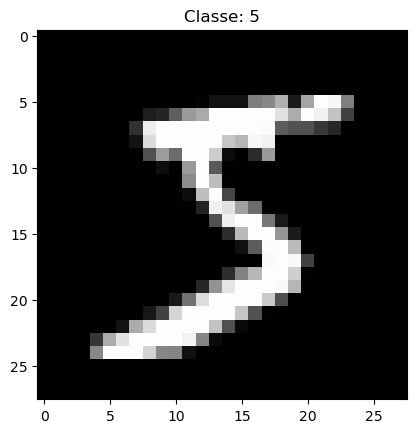

In [37]:
plt.imshow(X_treinamento[0], cmap = 'gray')
plt.title('Classe: ' + str(y_treinamento[0]));

In [38]:
# Transformando a matriz em um vetor
X_treinamento = X_treinamento.reshape(60000, 28 * 28)
X_treinamento.shape

(60000, 784)

In [39]:
X_treinamento[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [40]:
X_teste.shape

(10000, 28, 28)

In [41]:
X_teste = X_teste.reshape(10000, 28 * 28)
X_teste.shape

(10000, 784)

In [42]:
y_treinamento, y_teste

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

## Pré Processamento dos dados

In [43]:
# Obrigatório apenas na AWS
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [44]:
# Normalização - 255 maior valor
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [45]:
X_treinamento[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [46]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [47]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Saídas da rede neural com 10 neurônios

In [48]:
# Como é uma rede neural com 10 classes, vai ser feita a transformação (retornará 10 classes e apenas 1 neuronio com a resposta correta)
y_treinamento = np_utils.to_categorical(y_treinamento)

In [51]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [52]:
y_teste = np_utils.to_categorical(y_teste)
y_teste

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Construção e treinamento da rede neural

In [53]:
# Soma dos neuronios da camada de entrada com os da camada de saída e dividir por 2
(784 + 10) / 2

397.0

In [54]:
rede_neural = Sequential()
rede_neural.add(Dense(input_shape = (784, ), units = 397, activation = 'relu')) #Entrada
rede_neural.add(Dense(units = 397, activation = 'relu'))
rede_neural.add(Dense(units = 10, activation = 'softmax')) #Saída

In [55]:
rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [56]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size = 128, epochs = 20, verbose = 1)

2025-01-09 15:42:49.574966: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.2320 - accuracy: 0.9308
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0848 - accuracy: 0.9743
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0560 - accuracy: 0.9820
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0388 - accuracy: 0.9872
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0269 - accuracy: 0.9913
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0230 - accuracy: 0.9924
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0159 - accuracy: 0.9951
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0179 - accuracy: 0.9939
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0146 - accuracy: 0.9950
Epoch 10/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0136 - accura

## Avaliação e Previsões

In [58]:
rede_neural.evaluate(X_teste, y_teste)

2025-01-09 15:45:42.073972: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.0997 - accuracy: 0.9821


[0.09970037639141083, 0.9821000099182129]

In [59]:
previsoes = rede_neural.predict(X_teste)

  1/313 [..............................] - ETA: 32s

2025-01-09 15:46:06.201250: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step


In [61]:
# Probabilidade para cada uma das imagens
previsoes

array([[5.4372939e-18, 3.7907858e-14, 4.6814244e-14, ..., 9.9999994e-01,
        7.5092171e-17, 1.5342443e-14],
       [2.6193925e-18, 4.9084920e-12, 9.9999994e-01, ..., 1.0118488e-16,
        8.1221446e-20, 2.4756303e-28],
       [7.2171647e-17, 9.9999994e-01, 5.9485007e-13, ..., 3.5464257e-10,
        3.8019770e-12, 3.4847630e-18],
       ...,
       [3.5909211e-21, 3.3914145e-14, 5.6814785e-18, ..., 4.4461864e-14,
        5.7193330e-12, 3.6974373e-15],
       [1.3964051e-21, 2.2321686e-17, 5.1498602e-22, ..., 3.1657436e-14,
        4.3928097e-11, 3.3403810e-23],
       [2.7656259e-19, 1.2755694e-23, 4.1616639e-22, ..., 5.5140856e-30,
        5.0378357e-17, 2.9695076e-26]], dtype=float32)

In [62]:
previsoes.shape

(10000, 10)

In [63]:
previsoes[0]

array([5.4372939e-18, 3.7907858e-14, 4.6814244e-14, 7.6643824e-13,
       6.5276712e-20, 2.4505372e-18, 9.5986090e-25, 9.9999994e-01,
       7.5092171e-17, 1.5342443e-14], dtype=float32)

In [65]:
np.argmax(previsoes[0])

7

In [64]:
import numpy as np
np.argmax(y_teste[0])

7

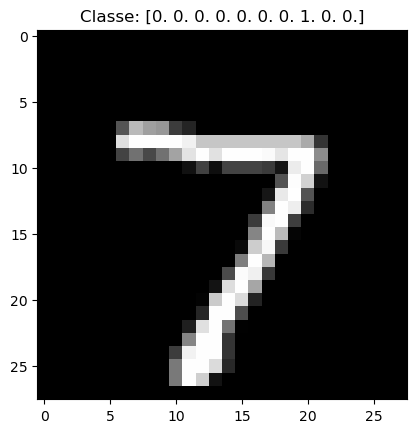

In [66]:
plt.imshow(X_teste[0].reshape(28,28), cmap='gray')
plt.title('Classe: ' + str(y_teste[0]));

In [67]:
# Equivalente ao endpoint
rede_neural.save('modelo_final_tensorflow.h5')

In [68]:
nova_rede_neural = tensorflow.keras.models.load_model('modelo_final_tensorflow.h5')

In [69]:
nova_rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 397)               311645    
                                                                 
 dense_1 (Dense)             (None, 397)               158006    
                                                                 
 dense_2 (Dense)             (None, 10)                3980      
                                                                 
Total params: 473,631
Trainable params: 473,631
Non-trainable params: 0
_________________________________________________________________


In [70]:
nova_rede_neural.predict(X_teste)

 14/313 [>.............................] - ETA: 1s 

2025-01-09 15:50:56.232748: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step


array([[5.4372939e-18, 3.7907858e-14, 4.6814244e-14, ..., 9.9999994e-01,
        7.5092171e-17, 1.5342443e-14],
       [2.6193925e-18, 4.9084920e-12, 9.9999994e-01, ..., 1.0118488e-16,
        8.1221446e-20, 2.4756303e-28],
       [7.2171647e-17, 9.9999994e-01, 5.9485007e-13, ..., 3.5464257e-10,
        3.8019770e-12, 3.4847630e-18],
       ...,
       [3.5909211e-21, 3.3914145e-14, 5.6814785e-18, ..., 4.4461864e-14,
        5.7193330e-12, 3.6974373e-15],
       [1.3964051e-21, 2.2321686e-17, 5.1498602e-22, ..., 3.1657436e-14,
        4.3928097e-11, 3.3403810e-23],
       [2.7656259e-19, 1.2755694e-23, 4.1616639e-22, ..., 5.5140856e-30,
        5.0378357e-17, 2.9695076e-26]], dtype=float32)